# **Tensorflow_Redes_Neurais**

##### Esse modelo foi desenvolvido para identificar o tipo de fases envolvidas em um curto circuito de uma linha de transmissão de energia eletrica com mais de 300 km de comprimento. Ou seja, o modelo mostra se o curto circuito acorreu entre as fases AG, BG, CG, AB, BC, CA, ABG, BCG, CAG, OU ABC. G = Fase Terra

#### Esse modelo é uma parte do algoritmo que desenvolvi na dissertação do meu mestrado em engenharia eletrica da Escola Politecnica da USP




#### OBS: Salientando que as redes neurais artificiais não são bons modelos para dados tabulares


# Importando bibliotecas

In [1]:
# IMPORTANDO BIBLIOTECAS
import sklearn
import pickle
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras as tfk
from tensorflow import keras
from sklearn.metrics import mean_squared_log_error, r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, classification_report

# configurações adicionais de figuras
"""plt.rcParams["figure.figsize"] = [10, 5]
plt.style.use("fivethirtyeight")
%config InlineBackend.figure_format = 'retina'
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['DejaVu Sans'],'size':10})
rc('mathtext',**{'default':'regular'})"""


import pandas as pd
import numpy as np

import seaborn as sns 

%matplotlib inline
pd.set_option("display.max_columns", 81)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Pré processamento dos dados 

In [2]:
# IMPORTANDO E LENDO OS DADOS
df = pd.read_csv("https://drive.google.com/uc?export=download&id=1B6Ph7ycg2yT-i-gr7r5vxtyVwDBAQccY")

In [3]:
# Visualização dos dados 
df.head()

,VLar,VLai,VLbr,VLbi,VLcr,VLci,ILar,ILai,ILbr,ILbi,ILcr,ILci,VRar,VRai,VRbr,VRbi,VRcr,VRci,IRar,IRai,IRbr,IRbi,IRcr,IRci,tipofal,instfal,trechofal,dfal,rfal,distid
0,-107557.138184,0,53668.545486,-92812.695325,54055.703363,54055.703363,3435.627258,3825.802625,-5025.021151,1080.323670,1615.990995,-4913.718907,-14116.094346,0,6589.530825,-11398.368801,7604.398037,10942.979406,-2031.218860,960.771678,-1671.103917,31.675106,755.282575,-1583.760152,10,0.05,1,0.02,0.1,102
1,-101437.609223,0,51004.245935,-87809.092439,51098.251088,51098.251088,4886.922501,678.548522,-3036.537168,3894.849355,-1828.630771,-4592.981801,-13567.179664,0,6390.783129,-10907.595158,7223.479977,10453.132242,-1960.414942,1041.136686,-1647.312710,140.582855,640.716935,-1611.081879,10,0.05,1,0.02,1.0,102
2,-75408.149486,0,38136.910429,-65714.499532,37925.635617,37925.635617,4608.423179,-73.775579,-2267.403982,4022.751885,-2323.624074,-3967.743152,-10576.628032,0,5176.401114,-8364.225295,5336.310413,7948.874735,-1595.016934,1264.787418,-1433.932271,509.370476,194.096714,-1576.736122,10,0.05,1,0.02,5.0,102
3,-21357.075804,0,10633.440027,-19109.819910,11036.808100,11036.808100,2529.422559,-112.275075,-1200.258148,2259.131563,-1321.027977,-2155.811511,-2076.093052,0,1170.772528,-1476.443662,757.065233,1308.319341,-615.548587,968.364720,-498.222237,640.961929,-356.730812,-761.305465,10,0.05,1,0.02,25.0,102
4,-8976.457009,0,4354.491713,-8131.522956,4795.025172,4795.025172,1465.107753,-68.733055,-691.498760,1315.679211,-769.131328,-1251.890947,-382.939606,0,283.661826,-165.242713,-1.947133,86.363256,-445.716320,625.205121,-212.625938,413.004221,-279.324578,-391.641879,10,0.05,1,0.02,50.0,102


In [4]:
df.columns

Index(['VLar', 'VLai', 'VLbr', 'VLbi', 'VLcr', 'VLci', 'ILar', 'ILai', 'ILbr',
       'ILbi', 'ILcr', 'ILci', 'VRar', 'VRai', 'VRbr', 'VRbi', 'VRcr', 'VRci',
       'IRar', 'IRai', 'IRbr', 'IRbi', 'IRcr', 'IRci', 'tipofal', 'instfal',
       'trechofal', 'dfal', 'rfal', 'distid'],
      dtype='object')

In [5]:
# Filtrando os dados para definir a base de dados a ser usada
df_novo = df.drop(['instfal',
       'trechofal', 'dfal', 'rfal', 'distid'], axis = 1)

In [6]:
# Base de dados definido
df_novo.head()

,VLar,VLai,VLbr,VLbi,VLcr,VLci,ILar,ILai,ILbr,ILbi,ILcr,ILci,VRar,VRai,VRbr,VRbi,VRcr,VRci,IRar,IRai,IRbr,IRbi,IRcr,IRci,tipofal
0,-107557.138184,0,53668.545486,-92812.695325,54055.703363,54055.703363,3435.627258,3825.802625,-5025.021151,1080.323670,1615.990995,-4913.718907,-14116.094346,0,6589.530825,-11398.368801,7604.398037,10942.979406,-2031.218860,960.771678,-1671.103917,31.675106,755.282575,-1583.760152,10
1,-101437.609223,0,51004.245935,-87809.092439,51098.251088,51098.251088,4886.922501,678.548522,-3036.537168,3894.849355,-1828.630771,-4592.981801,-13567.179664,0,6390.783129,-10907.595158,7223.479977,10453.132242,-1960.414942,1041.136686,-1647.312710,140.582855,640.716935,-1611.081879,10
2,-75408.149486,0,38136.910429,-65714.499532,37925.635617,37925.635617,4608.423179,-73.775579,-2267.403982,4022.751885,-2323.624074,-3967.743152,-10576.628032,0,5176.401114,-8364.225295,5336.310413,7948.874735,-1595.016934,1264.787418,-1433.932271,509.370476,194.096714,-1576.736122,10
3,-21357.075804,0,10633.440027,-19109.819910,11036.808100,11036.808100,2529.422559,-112.275075,-1200.258148,2259.131563,-1321.027977,-2155.811511,-2076.093052,0,1170.772528,-1476.443662,757.065233,1308.319341,-615.548587,968.364720,-498.222237,640.961929,-356.730812,-761.305465,10
4,-8976.457009,0,4354.491713,-8131.522956,4795.025172,4795.025172,1465.107753,-68.733055,-691.498760,1315.679211,-769.131328,-1251.890947,-382.939606,0,283.661826,-165.242713,-1.947133,86.363256,-445.716320,625.205121,-212.625938,413.004221,-279.324578,-391.641879,10


In [7]:
# Ajustar a variavel alvo (tipofal)
# As letras A, B, C representam as tensões e correntes e a G é fase terra

trocar = {
    1 : 'AG',
    2 : 'BG',
    3 : 'CG',
    4 : 'ABG',
    5 : 'BCG',
    6 : 'CAG',
    7 : 'AB',
    8 : 'BC',
    9 : 'CA',
    10 : 'ABC'
}
df_novo["tipofal"] = df_novo.tipofal.map(trocar)

In [8]:
df_novo

,VLar,VLai,VLbr,VLbi,VLcr,VLci,ILar,ILai,ILbr,ILbi,ILcr,ILci,VRar,VRai,VRbr,VRbi,VRcr,VRci,IRar,IRai,IRbr,IRbi,IRcr,IRci,tipofal
0,-107557.138184,0,53668.545486,-92812.695325,54055.703363,54055.703363,3435.627258,3825.802625,-5025.021151,1080.323670,1615.990995,-4913.718907,-14116.094346,0,6589.530825,-11398.368801,7604.398037,10942.979406,-2031.218860,960.771678,-1671.103917,31.675106,755.282575,-1583.760152,ABC
1,-101437.609223,0,51004.245935,-87809.092439,51098.251088,51098.251088,4886.922501,678.548522,-3036.537168,3894.849355,-1828.630771,-4592.981801,-13567.179664,0,6390.783129,-10907.595158,7223.479977,10453.132242,-1960.414942,1041.136686,-1647.312710,140.582855,640.716935,-1611.081879,ABC
2,-75408.149486,0,38136.910429,-65714.499532,37925.635617,37925.635617,4608.423179,-73.775579,-2267.403982,4022.751885,-2323.624074,-3967.743152,-10576.628032,0,5176.401114,-8364.225295,5336.310413,7948.874735,-1595.016934,1264.787418,-1433.932271,509.370476,194.096714,-1576.736122,ABC
3,-21357.075804,0,10633.440027,-19109.819910,11036.808100,11036.808100,2529.422559,-112.275075,-1200.258148,2259.131563,-1321.027977,-2155.811511,-2076.093052,0,1170.772528,-1476.443662,757.065233,1308.319341,-615.548587,968.364720,-498.222237,640.961929,-356.730812,-761.305465,ABC
4,-8976.457009,0,4354.491713,-8131.522956,4795.025172,4795.025172,1465.107753,-68.733055,-691.498760,1315.679211,-769.131328,-1251.890947,-382.939606,0,283.661826,-165.242713,-1.947133,86.363256,-445.716320,625.205121,-212.625938,413.004221,-279.324578,-391.641879,ABC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3904,-3035.575694,0,-5850.483422,-5051.788355,12364.826953,12364.826953,-162.316817,220.595551,-180.287414,189.065771,362.566361,-500.270448,-1470.969974,0,-2028.758974,-1160.473782,4360.854485,1193.118676,-656.485568,85.341865,-67.828456,186.649479,133.306954,-430.405903,CG
3905,-2787.056790,0,-4396.573260,-2827.117489,9935.302930,9935.302930,-80.950495,185.978519,-91.385086,169.067587,170.313497,-424.458721,-1202.330243,0,-1389.314851,-470.944466,3223.519663,342.682888,-612.903955,137.040385,-16.888588,148.496126,20.577767,-337.366122,CG
3906,-1975.516199,0,-2633.696361,-1129.375651,6340.379150,6340.379150,-24.404277,123.437297,-28.794014,117.265318,41.953181,-283.109415,-781.852531,0,-756.042755,-46.865654,1909.278579,-120.721063,-554.403171,162.882943,9.993329,94.268831,-34.695593,-211.337034,CG
3907,-949.624720,0,-1095.274856,-240.412272,2799.363985,2799.363985,-0.293477,56.309075,-1.338899,55.354056,-7.162013,-129.652890,-351.646904,0,-283.680499,77.707661,787.256446,-185.151910,-499.035493,163.129992,12.489846,41.510691,-33.928492,-91.954782,CG


In [9]:
# informações sobre os dados
# Visualização de dados nulos
df_novo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3909 entries, 0 to 3908
Data columns (total 25 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   VLar     3909 non-null   float64
 1   VLai     3909 non-null   int64  
 2   VLbr     3909 non-null   float64
 3   VLbi     3909 non-null   float64
 4   VLcr     3909 non-null   float64
 5   VLci     3909 non-null   float64
 6   ILar     3909 non-null   float64
 7   ILai     3909 non-null   float64
 8   ILbr     3909 non-null   float64
 9   ILbi     3909 non-null   float64
 10  ILcr     3909 non-null   float64
 11  ILci     3909 non-null   float64
 12  VRar     3909 non-null   float64
 13  VRai     3909 non-null   int64  
 14  VRbr     3909 non-null   float64
 15  VRbi     3909 non-null   float64
 16  VRcr     3909 non-null   float64
 17  VRci     3909 non-null   float64
 18  IRar     3909 non-null   float64
 19  IRai     3909 non-null   float64
 20  IRbr     3909 non-null   float64
 21  IRbi     3909 

In [10]:
#Descrição  estatistica geral
df_novo.describe().T

,count,mean,std,min,25%,50%,75%,max
VLar,3909.0,-9241.457257,15611.832406,-107566.923208,-13081.515350,-2139.031433,-93.551376,22159.378372
VLai,3909.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
VLbr,3909.0,4985.353444,14526.933843,-55093.280578,-1382.751418,1593.730692,8218.323717,140503.271398
VLbi,3909.0,-8914.391153,15778.921838,-101352.378616,-12378.017461,-3689.809217,-162.754148,32815.906826
VLcr,3909.0,4701.814703,16156.116401,-75187.902296,-1756.443823,1749.721808,9617.225545,122811.057937
VLci,3909.0,4701.814703,16156.116401,-75187.902296,-1756.443823,1749.721808,9617.225545,122811.057937
ILar,3909.0,213.636928,613.773946,-5116.713470,-0.091517,90.550631,303.570558,4886.922501
ILai,3909.0,390.162622,645.465294,-1429.924189,6.632165,112.806720,549.742103,4849.876371
ILbr,3909.0,-493.441548,732.448783,-5025.021151,-683.479892,-176.915625,-33.508329,721.102155
ILbi,3909.0,-15.309112,392.192657,-2375.637866,-134.161474,25.289959,120.947083,4022.751885


## Visualizaão grafica da classe

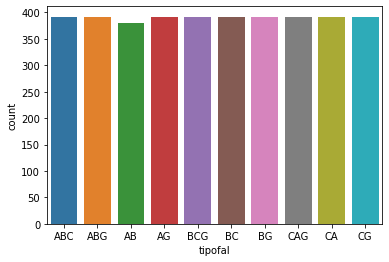

In [11]:
sns.countplot(x = "tipofal", data = df_novo);

#### Transformando a classe de categorico para numerica com o OneHotEncoder  

In [12]:
from sklearn.preprocessing import OneHotEncoder

In [13]:
#Convertendo a variavel (tipofal) de categorica para númerica continua aplicando o OneHotEncoder
binario = OneHotEncoder()
tipofal = binario.fit_transform(df_novo.tipofal.values.reshape(-1, 1)).toarray()


In [14]:
tipofal 

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

### Divisão das variaveis entre previsoras (X) e a classe (y)


In [15]:
X = df_novo.drop(['tipofal'], axis = 1)

In [16]:
X

,VLar,VLai,VLbr,VLbi,VLcr,VLci,ILar,ILai,ILbr,ILbi,ILcr,ILci,VRar,VRai,VRbr,VRbi,VRcr,VRci,IRar,IRai,IRbr,IRbi,IRcr,IRci
0,-107557.138184,0,53668.545486,-92812.695325,54055.703363,54055.703363,3435.627258,3825.802625,-5025.021151,1080.323670,1615.990995,-4913.718907,-14116.094346,0,6589.530825,-11398.368801,7604.398037,10942.979406,-2031.218860,960.771678,-1671.103917,31.675106,755.282575,-1583.760152
1,-101437.609223,0,51004.245935,-87809.092439,51098.251088,51098.251088,4886.922501,678.548522,-3036.537168,3894.849355,-1828.630771,-4592.981801,-13567.179664,0,6390.783129,-10907.595158,7223.479977,10453.132242,-1960.414942,1041.136686,-1647.312710,140.582855,640.716935,-1611.081879
2,-75408.149486,0,38136.910429,-65714.499532,37925.635617,37925.635617,4608.423179,-73.775579,-2267.403982,4022.751885,-2323.624074,-3967.743152,-10576.628032,0,5176.401114,-8364.225295,5336.310413,7948.874735,-1595.016934,1264.787418,-1433.932271,509.370476,194.096714,-1576.736122
3,-21357.075804,0,10633.440027,-19109.819910,11036.808100,11036.808100,2529.422559,-112.275075,-1200.258148,2259.131563,-1321.027977,-2155.811511,-2076.093052,0,1170.772528,-1476.443662,757.065233,1308.319341,-615.548587,968.364720,-498.222237,640.961929,-356.730812,-761.305465
4,-8976.457009,0,4354.491713,-8131.522956,4795.025172,4795.025172,1465.107753,-68.733055,-691.498760,1315.679211,-769.131328,-1251.890947,-382.939606,0,283.661826,-165.242713,-1.947133,86.363256,-445.716320,625.205121,-212.625938,413.004221,-279.324578,-391.641879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3904,-3035.575694,0,-5850.483422,-5051.788355,12364.826953,12364.826953,-162.316817,220.595551,-180.287414,189.065771,362.566361,-500.270448,-1470.969974,0,-2028.758974,-1160.473782,4360.854485,1193.118676,-656.485568,85.341865,-67.828456,186.649479,133.306954,-430.405903
3905,-2787.056790,0,-4396.573260,-2827.117489,9935.302930,9935.302930,-80.950495,185.978519,-91.385086,169.067587,170.313497,-424.458721,-1202.330243,0,-1389.314851,-470.944466,3223.519663,342.682888,-612.903955,137.040385,-16.888588,148.496126,20.577767,-337.366122
3906,-1975.516199,0,-2633.696361,-1129.375651,6340.379150,6340.379150,-24.404277,123.437297,-28.794014,117.265318,41.953181,-283.109415,-781.852531,0,-756.042755,-46.865654,1909.278579,-120.721063,-554.403171,162.882943,9.993329,94.268831,-34.695593,-211.337034
3907,-949.624720,0,-1095.274856,-240.412272,2799.363985,2799.363985,-0.293477,56.309075,-1.338899,55.354056,-7.162013,-129.652890,-351.646904,0,-283.680499,77.707661,787.256446,-185.151910,-499.035493,163.129992,12.489846,41.510691,-33.928492,-91.954782


In [17]:
y = tipofal

In [18]:
y

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [19]:
# Correlação
X.corr()

,VLar,VLai,VLbr,VLbi,VLcr,VLci,ILar,ILai,ILbr,ILbi,ILcr,ILci,VRar,VRai,VRbr,VRbi,VRcr,VRci,IRar,IRai,IRbr,IRbi,IRcr,IRci
VLar,1.000000,NaN,-0.343596,0.201014,-0.108840,-0.108840,-0.320006,-0.898366,0.233205,0.295573,-0.107927,0.436105,0.527006,NaN,-0.292643,0.026377,-0.012266,-0.149138,0.504117,-0.343030,0.142132,0.246783,0.031904,0.266569
VLai,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VLbr,-0.343596,NaN,1.000000,-0.234780,-0.469655,-0.469655,0.821404,0.127150,-0.455961,-0.468970,-0.227459,0.103768,-0.106769,NaN,0.481323,-0.169502,-0.345762,0.094386,-0.092055,0.489022,-0.321570,-0.308782,-0.063370,0.137392
VLbi,0.201014,NaN,-0.234780,1.000000,-0.151954,-0.151954,-0.129907,-0.175246,0.932986,0.129373,-0.567584,0.179523,0.073488,NaN,-0.023163,0.428706,-0.089253,-0.207131,0.084082,-0.089661,0.414017,-0.085513,-0.316506,0.143867
VLcr,-0.108840,NaN,-0.469655,-0.151954,1.000000,1.000000,-0.658109,0.378169,0.037263,0.078614,0.581875,-0.813938,-0.180272,NaN,-0.247886,0.007816,0.552824,0.080589,-0.240254,-0.304960,0.108026,0.143672,0.168216,-0.474929
VLci,-0.108840,NaN,-0.469655,-0.151954,1.000000,1.000000,-0.658109,0.378169,0.037263,0.078614,0.581875,-0.813938,-0.180272,NaN,-0.247886,0.007816,0.552824,0.080589,-0.240254,-0.304960,0.108026,0.143672,0.168216,-0.474929
ILar,-0.320006,NaN,0.821404,-0.129907,-0.658109,-0.658109,1.000000,-0.000346,-0.379087,-0.000883,-0.459975,0.157613,-0.008401,NaN,0.344996,-0.056483,-0.404812,0.000443,0.033750,0.464212,-0.199841,-0.120466,-0.168545,0.208581
ILai,-0.898366,NaN,0.127150,-0.175246,0.378169,0.378169,-0.000346,1.000000,-0.179001,-0.428521,0.292269,-0.574775,-0.577554,NaN,0.238615,-0.057222,0.158360,0.186543,-0.573963,0.246502,-0.140856,-0.234315,0.041680,-0.383882
ILbr,0.233205,NaN,-0.455961,0.932986,0.037263,0.037263,-0.379087,-0.179001,1.000000,0.159708,-0.499322,0.160559,0.069798,NaN,-0.134926,0.440996,0.011665,-0.257524,0.074935,-0.215685,0.480889,-0.062861,-0.310663,0.111617
ILbi,0.295573,NaN,-0.468970,0.129373,0.078614,0.078614,-0.000883,-0.428521,0.159708,1.000000,-0.050427,-0.177326,0.312411,NaN,-0.428461,0.199354,0.155769,-0.112694,0.313491,-0.304360,0.282888,0.482670,-0.025383,-0.016676


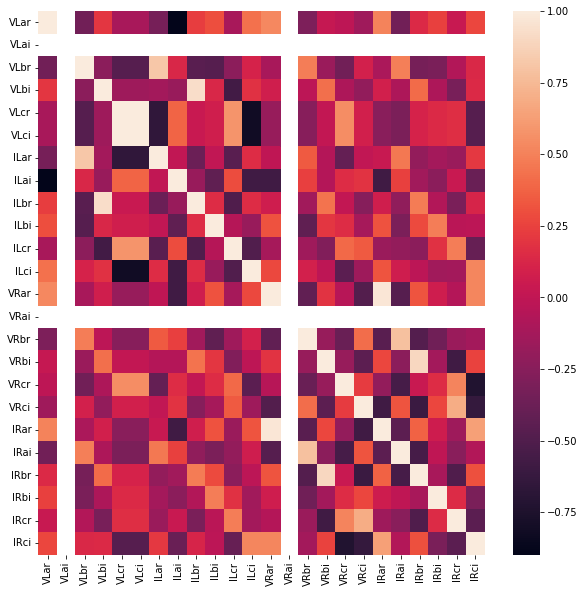

In [20]:
# Visualização grafica da correlação
plt.figure(figsize=(10,10))
sns.heatmap(X.corr());

### Divisão dos dados entre treino e teste

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
# 30% dos dados estão resrvados para teste
tamanho_teste = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=tamanho_teste, random_state=0)
#X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [23]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2736, 24), (1173, 24), (2736, 10), (1173, 10))

**Padronização**

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
escala = StandardScaler()
escala.fit(X_train)

StandardScaler()

In [26]:
X_train = escala.transform(X_train)

In [27]:
X_test = escala.transform(X_test)

In [28]:
tf.random.set_seed(2)
entradas = tfk.layers.Input((X_train.shape[1], )) # Entada dos dados
camada_esc_1 = tfk.layers.Dense(15, activation="relu")(entradas) # definição da primeira camada escondida com 15 neurônios
drop = tfk.layers.Dropout(0.5)(camada_esc_1)
camada_esc_2 = tfk.layers.Dense(15, activation="relu")(drop) # definição da segunda camada escondida com 15 neurônios
saida = tfk.layers.Dense(1, activation="sigmoid")(camada_esc_2) # definição da camada de saída

In [29]:
# Definição do modelo 
modelo = tfk.Model(entradas, saida)
modelo.compile(loss="mean_squared_error", optimizer="adam") #, metrics=[''])
modelo.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 24)]              0         
                                                                 
 dense (Dense)               (None, 15)                375       
                                                                 
 dropout (Dropout)           (None, 15)                0         
                                                                 
 dense_1 (Dense)             (None, 15)                240       
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 631
Trainable params: 631
Non-trainable params: 0
_________________________________________________________________


In [30]:
es = tfk.callbacks.EarlyStopping(monitor= "val_loss", min_delta=10, patience = 5, mode="min", restore_best_weights=True)

# **Treinamento**

In [31]:
modelo.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 15, shuffle = True, batch_size = 1, callbacks=[es])

Epoch 1/15
2736/2736 [==============================] - 13s 4ms/step - loss: 0.0959 - val_loss: 0.0907
Epoch 2/15
2736/2736 [==============================] - 10s 3ms/step - loss: 0.0903 - val_loss: 0.0901
Epoch 3/15
2736/2736 [==============================] - 5s 2ms/step - loss: 0.0901 - val_loss: 0.0900
Epoch 4/15
2736/2736 [==============================] - 6s 2ms/step - loss: 0.0900 - val_loss: 0.0900
Epoch 5/15
2736/2736 [==============================] - 5s 2ms/step - loss: 0.0900 - val_loss: 0.0900
Epoch 6/15
2736/2736 [==============================] - 5s 2ms/step - loss: 0.0900 - val_loss: 0.0900


In [32]:
modelo.history.history

{'loss': [0.09588871896266937,
  0.09026981145143509,
  0.09007226675748825,
  0.090009905397892,
  0.09000343084335327,
  0.09000062942504883],
 'val_loss': [0.09067598730325699,
  0.09007163345813751,
  0.09001153707504272,
  0.09000380337238312,
  0.0900002121925354,
  0.09000130742788315]}

In [33]:
pd.DataFrame(modelo.history.history)

,loss,val_loss
0,0.095889,0.090676
1,0.090270,0.090072
2,0.090072,0.090012
3,0.090010,0.090004
4,0.090003,0.090000
5,0.090001,0.090001


Text(0, 0.5, 'RMS')

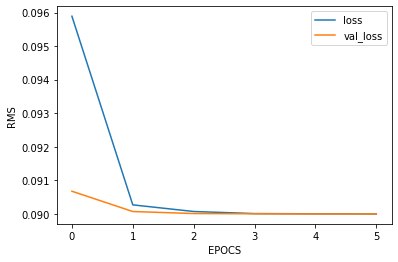

In [34]:
pd.DataFrame(modelo.history.history).plot();
plt.xlabel("EPOCS")
plt.ylabel("RMS")
#pd.DataFrame(modelo.history.history["loss"]).plot()
#plt.legend(["loss_train"])
#pd.DataFrame(modelo.history.history["val_loss"]).plot()
#plt.legend(["loss_test"])